In [14]:
from __future__ import division

from gio_model import GioModel
from constants import GioConstants
from math import sqrt
from time import sleep, time

import numpy as np
import matplotlib.colors
import matplotlib.pyplot as plt
import os

%matplotlib inline

Turn off auto scrolling

In [15]:
%%javascript
require(
        ["notebook/js/outputarea"],
        function (oa) {
            oa.OutputArea.auto_scroll_threshold = -1;
        });

<IPython.core.display.Javascript object>

In [16]:
import numpy as np
import tensorflow as tf

tf.InteractiveSession()

ROOT_DIR = '/Users/abel/data'

def get_model(game_id):
    return GioModel.fromFile(ROOT_DIR + '/gio/models/%s.giomodel.gz' % (game_id))

models = os.listdir(ROOT_DIR + '/gio/models')
game_ids = map(lambda x: x[:x.find('.')], models)

In [4]:
model = get_model(game_ids[10])

print 'http://generals.io/replays/' + model.id

print model.ranks

http://generals.io/replays/B5-EAph8l
[7, 5, 3, 4, 0, 2, 6, 1]


In [7]:
model = get_model(game_ids[10])

print model.board_[0, 4, 1]
print model.isVisible(881, 4, 1, 7)

[ 1.  5.  4.]
True


In [8]:
owner_ch = model.board_[:, :, :, 1]
owner_ch[owner_ch == 1] = -2
owner_ch[owner_ch == 0] = 1
owner_ch[owner_ch == -2] = 0

Visualize channels for a random game (at a resolution of every 32 timesteps):

In [12]:
tf.constant(np.random.random((2, 2))).get_shape().as_list()

[2, 2]

In [9]:
a = zip(np.min(model.board_, axis=(0, 1, 2)), np.max(model.board_, axis=(0, 1, 2)))[0]

http://generals.io/replays/B5-EAph8l
[7, 5, 3, 4, 0, 2, 6, 1]


/usr/local/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


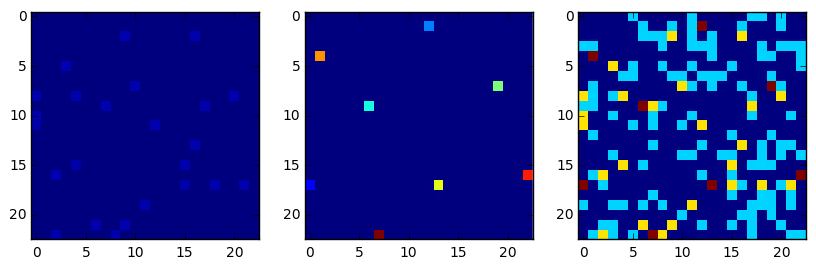

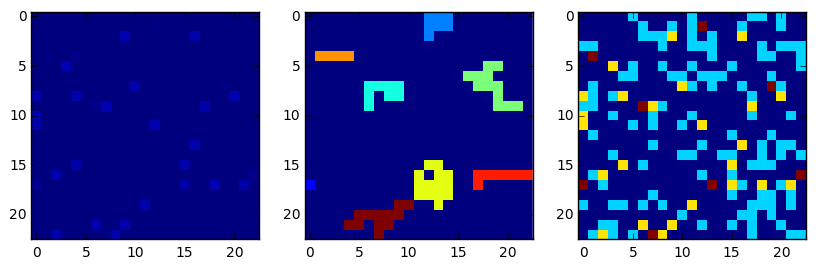

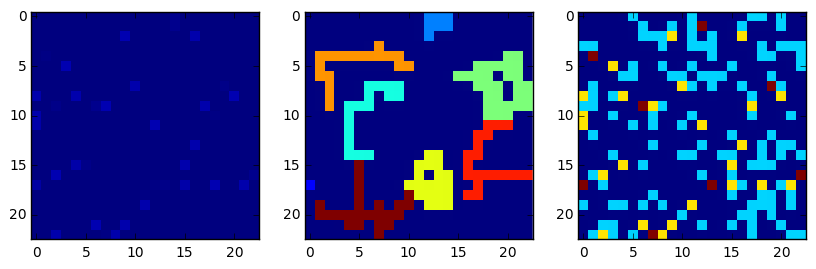

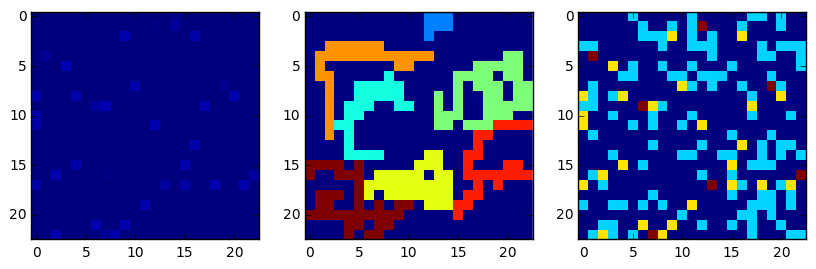

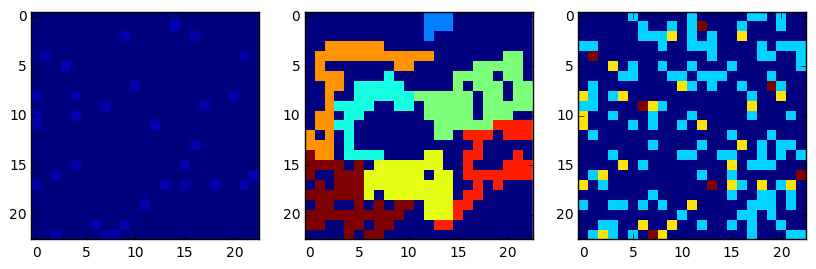

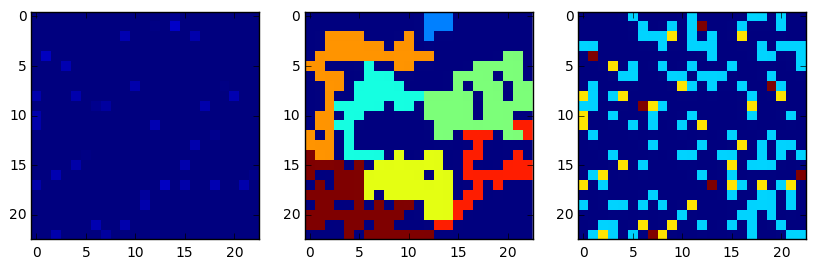

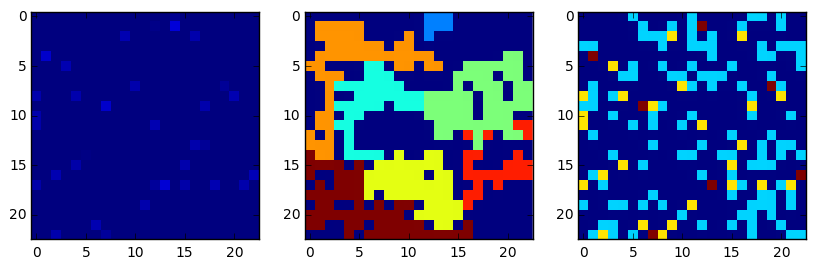

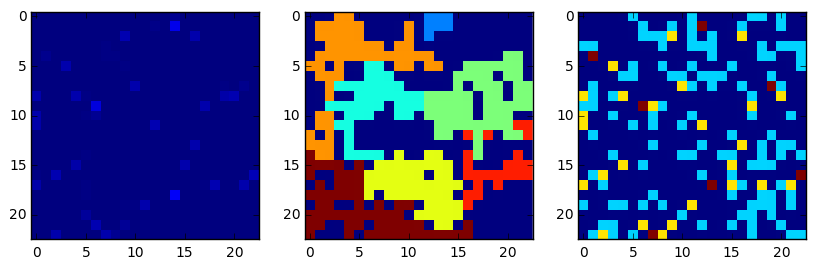

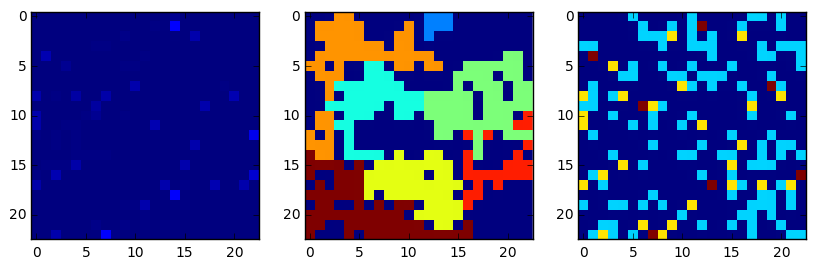

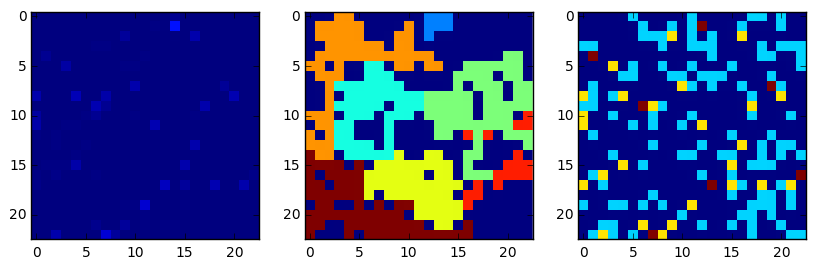

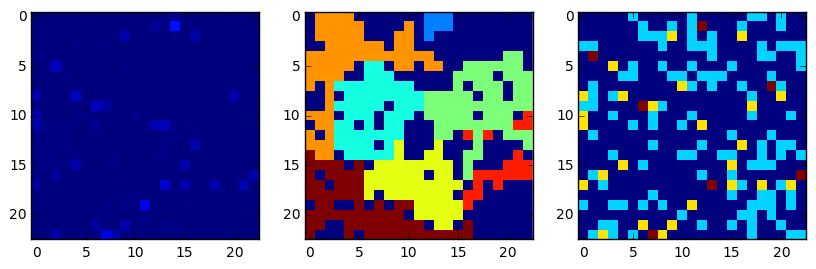

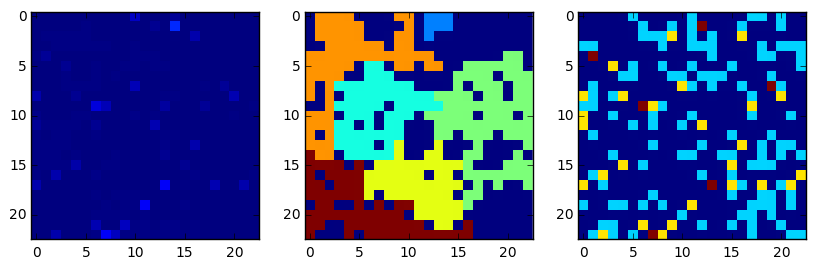

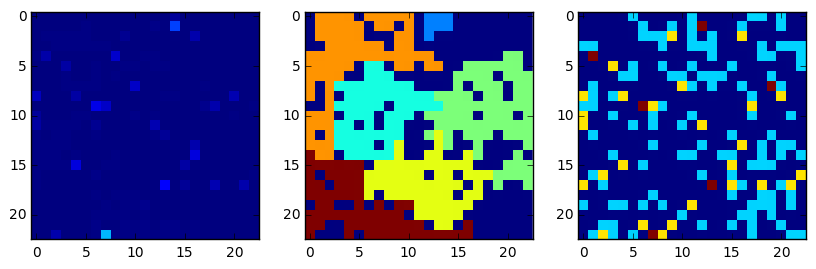

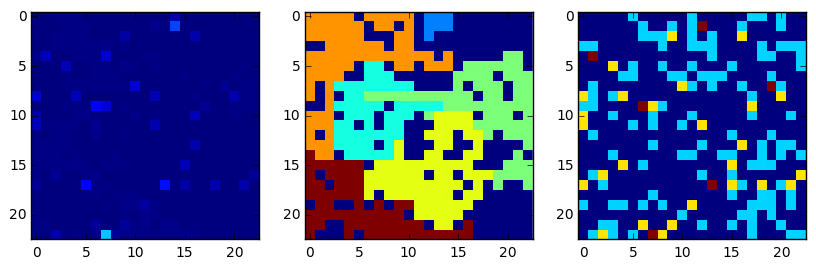

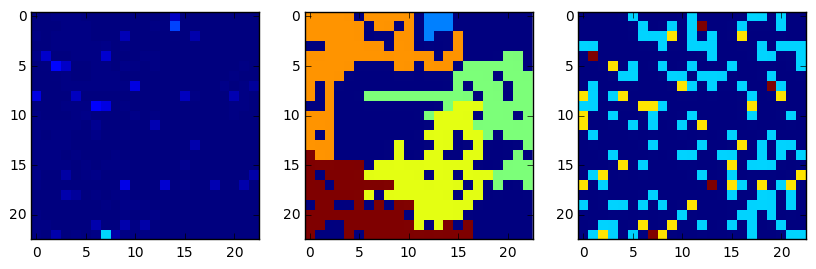

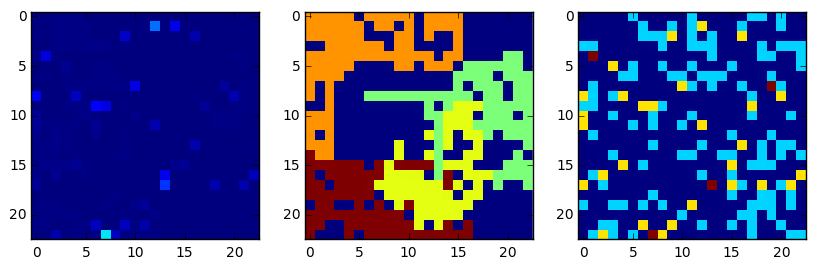

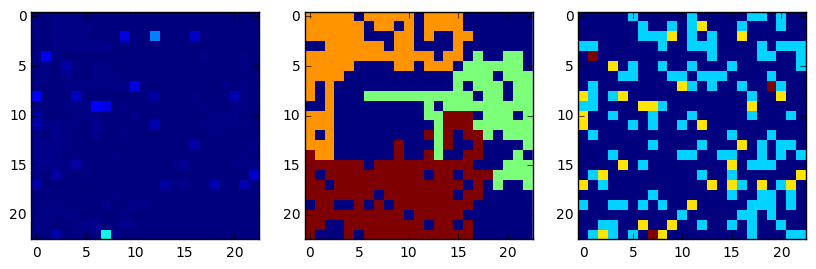

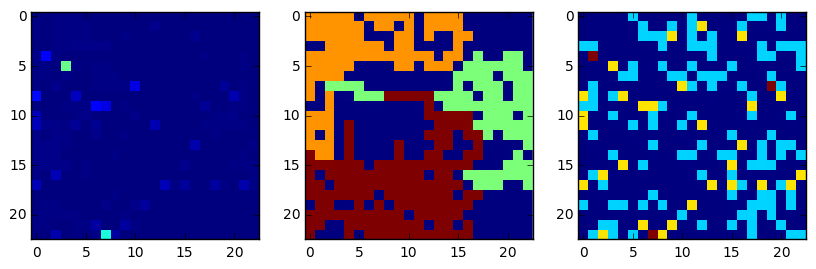

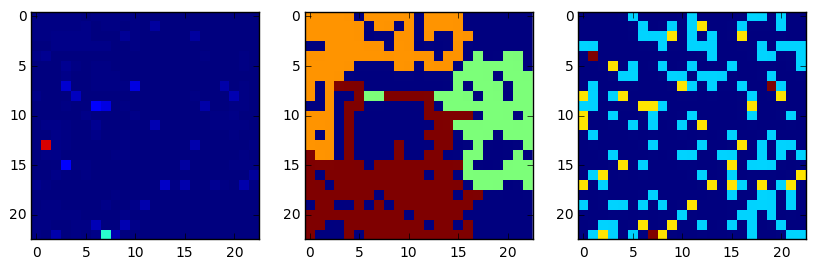

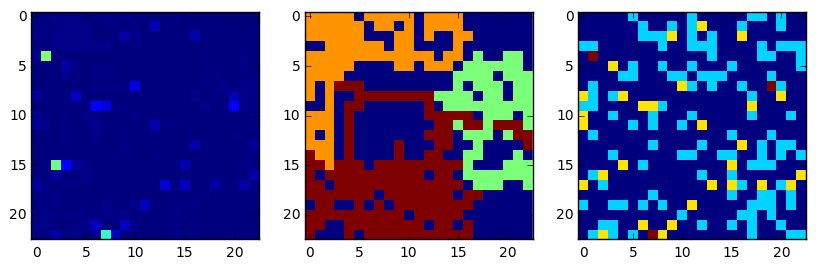

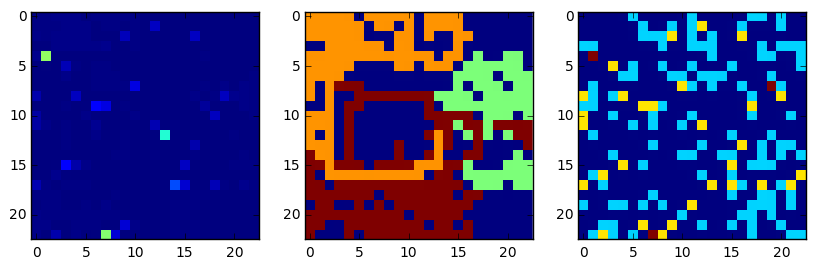

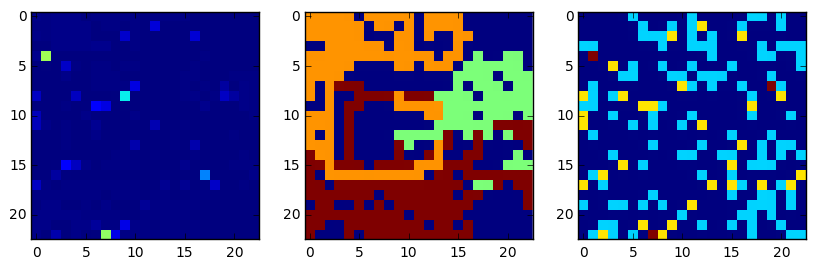

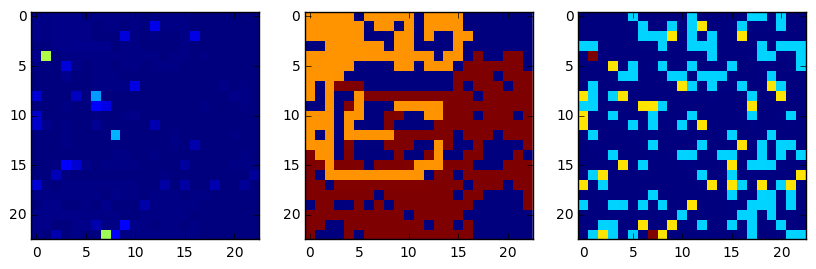

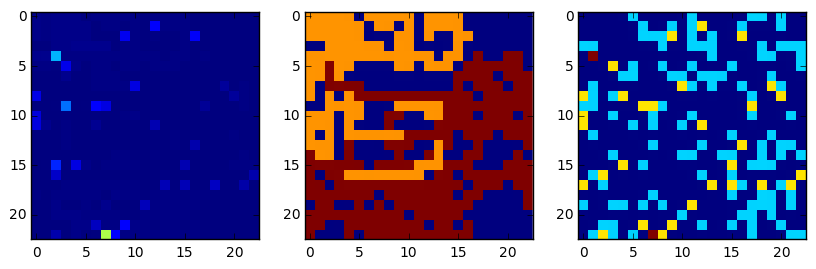

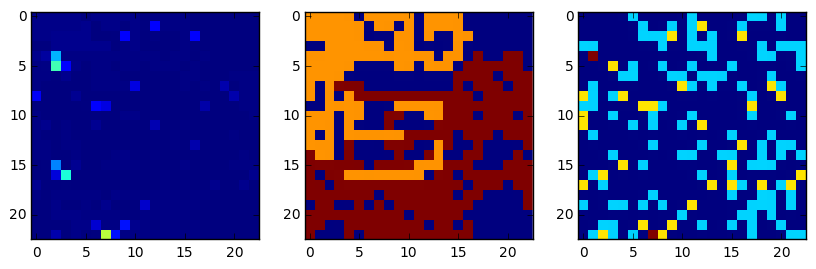

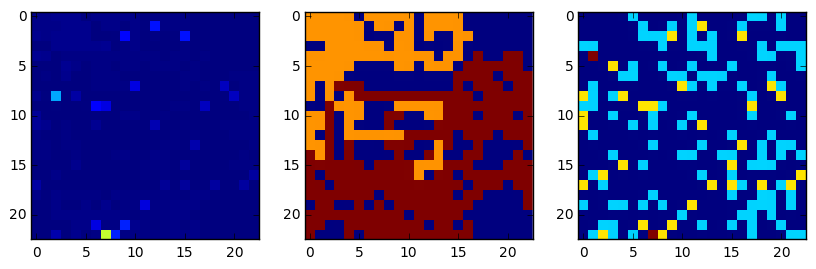

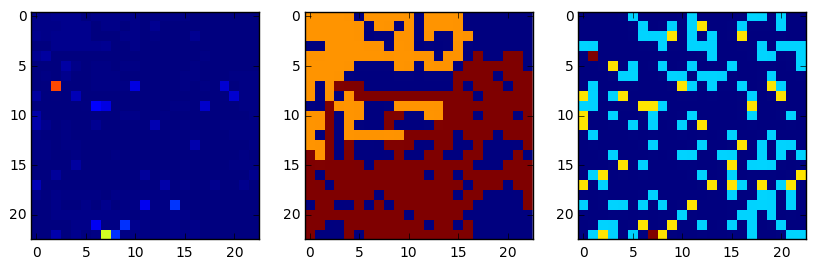

In [10]:
# model = get_model(np.random.choice(game_ids, 1)[0])

def visualize_game(model, res=32, view=None):
    print 'http://generals.io/replays/' + model.id
    print model.ranks
    board = model.getBoardView(view) if view is not None else model.board_
    color_norms = [matplotlib.colors.Normalize(*args) for args in 
                   zip(np.min(board, axis=(0, 1, 2)), np.max(board, axis=(0, 1, 2)))]
    for i in range(board.shape[0] // res):
        turn = i * res
        fig, axs = plt.subplots(1, 3, figsize=(10, 10))
        for i in range(3):
            axs[i].imshow(board[turn][:, :, i], interpolation='none', norm=color_norms[i])

visualize_game(model)

Visualize game from player-index 0's perspective:

http://generals.io/replays/B5-EAph8l
[7, 5, 3, 4, 0, 2, 6, 1]


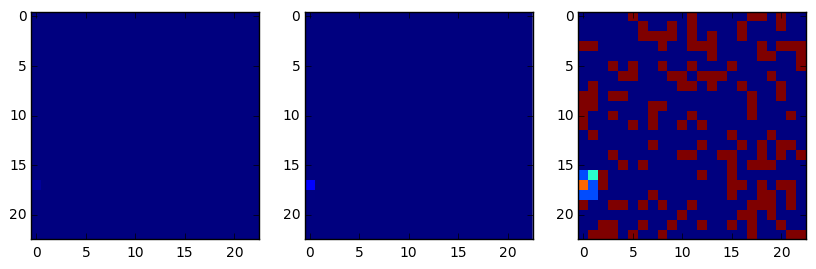

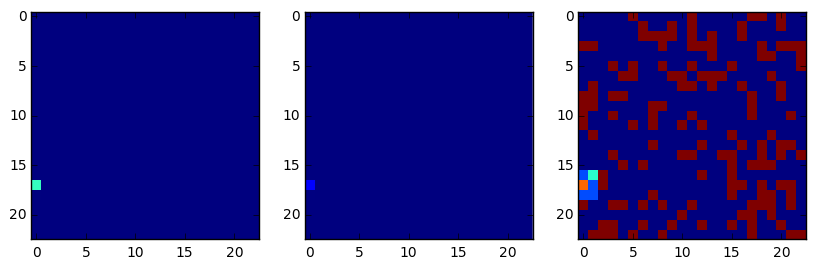

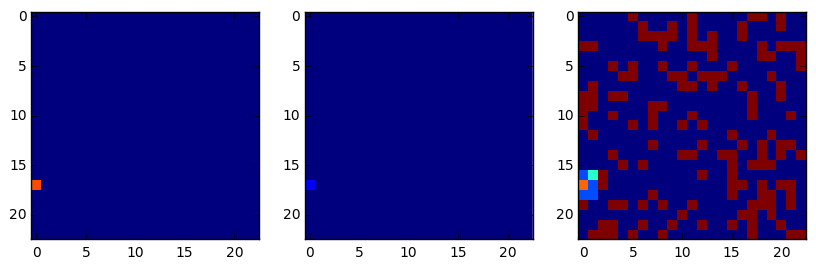

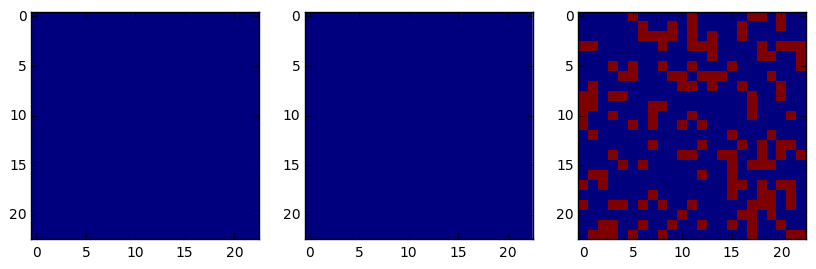

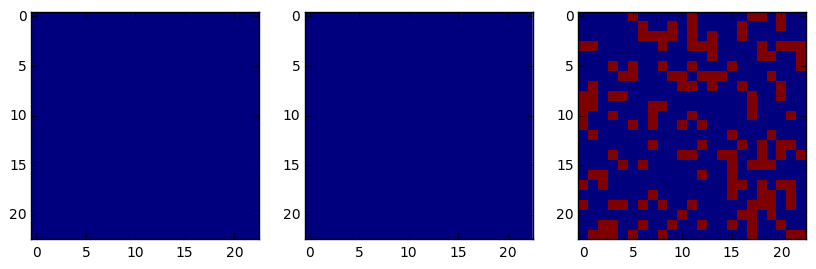

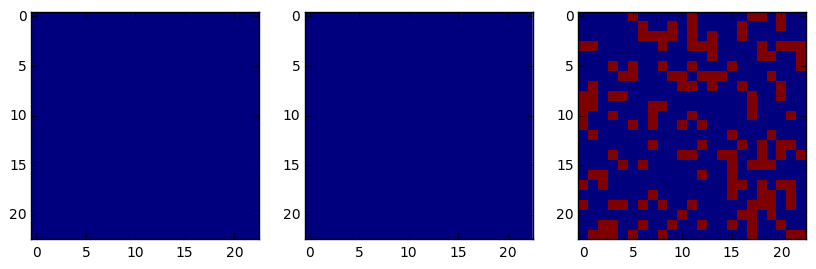

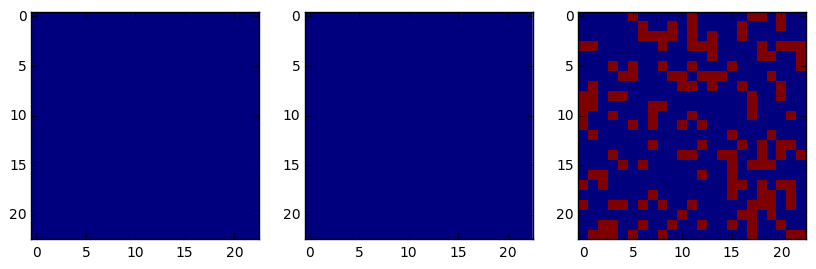

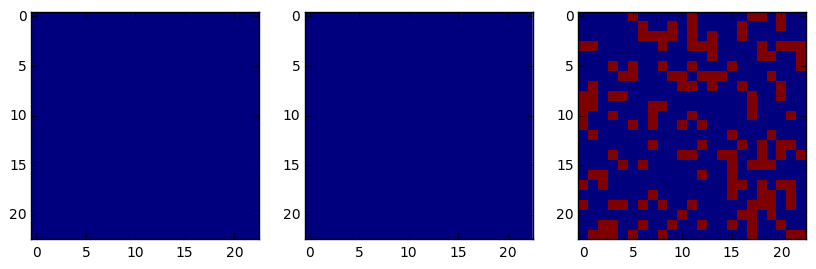

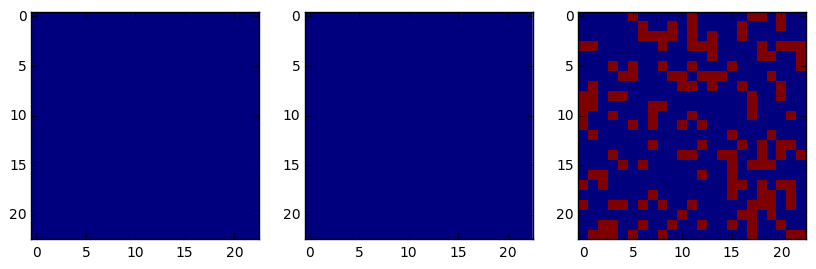

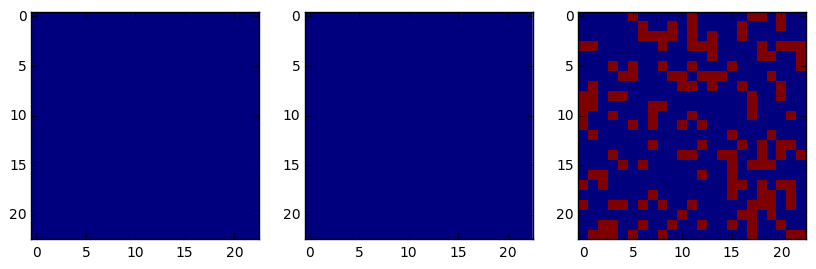

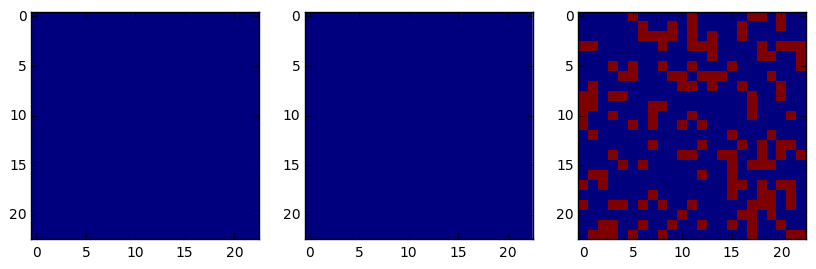

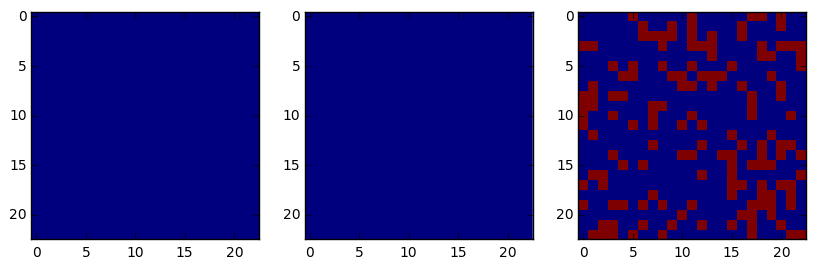

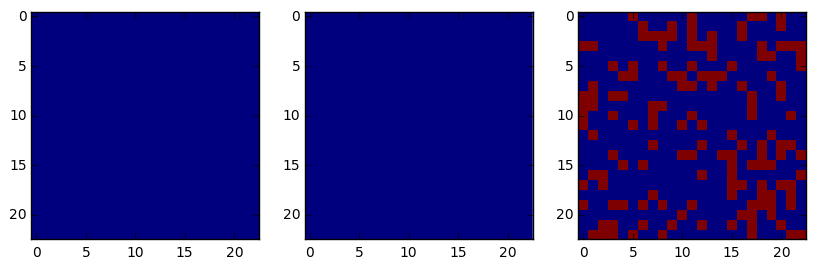

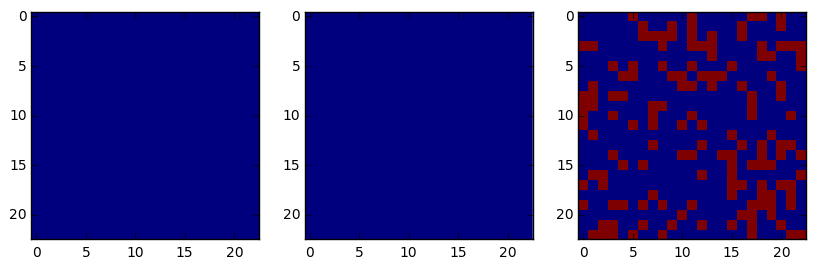

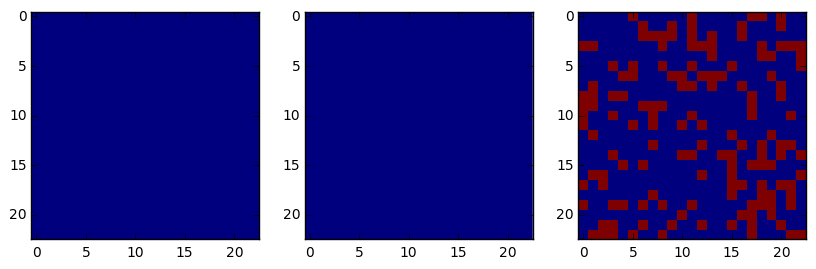

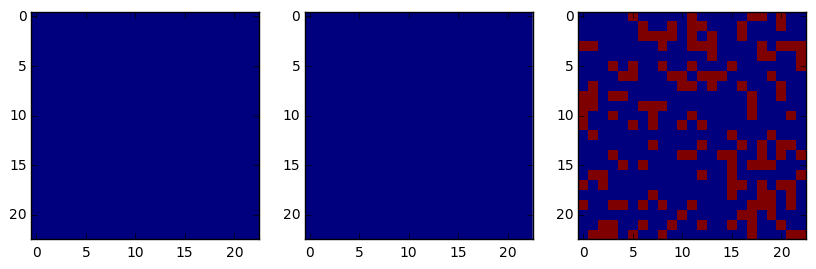

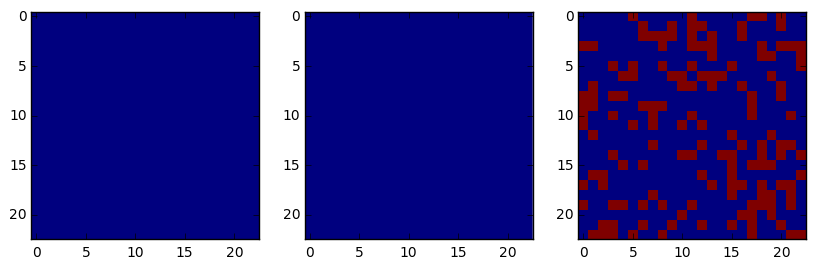

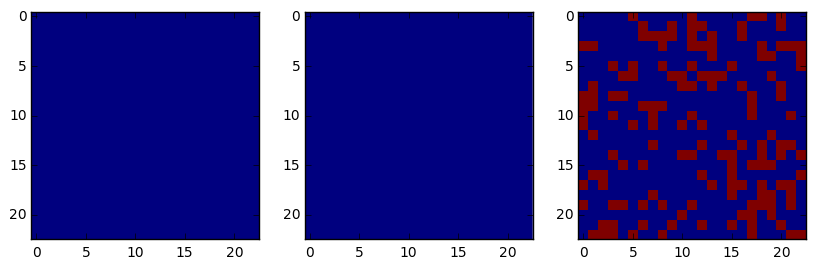

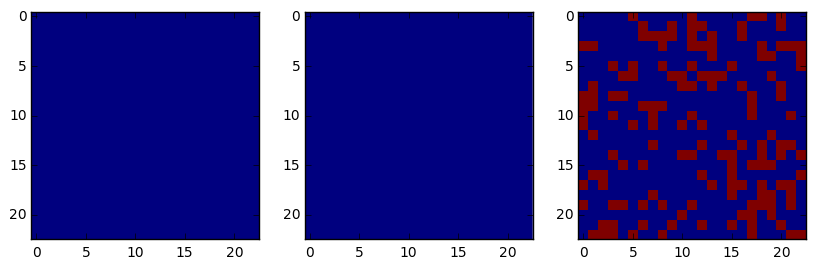

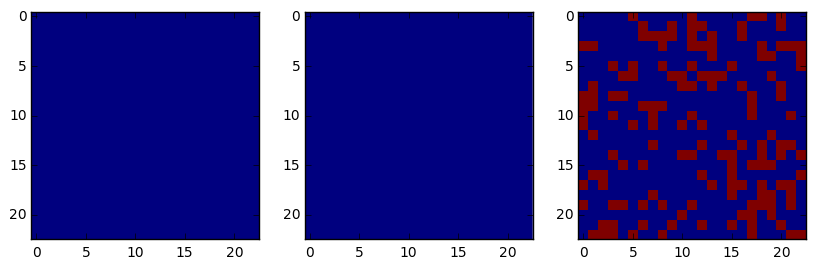

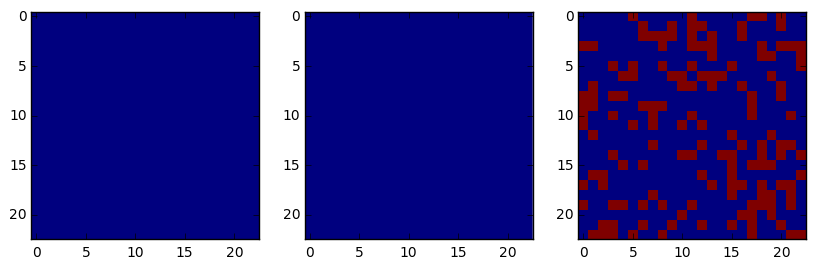

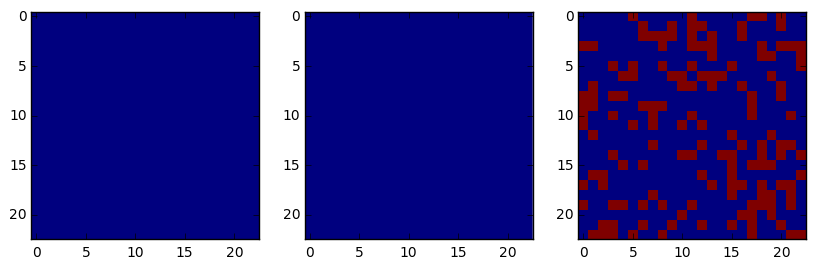

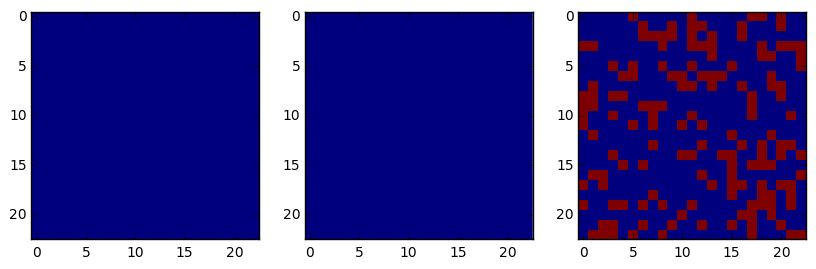

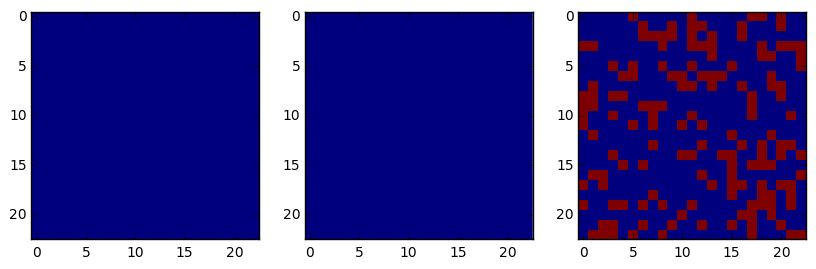

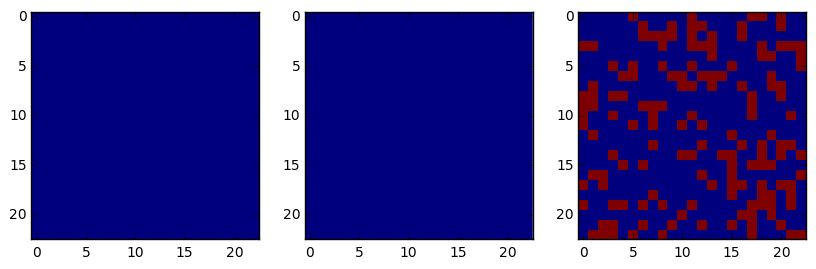

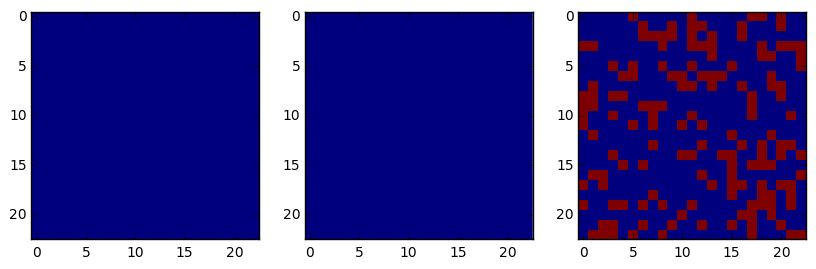

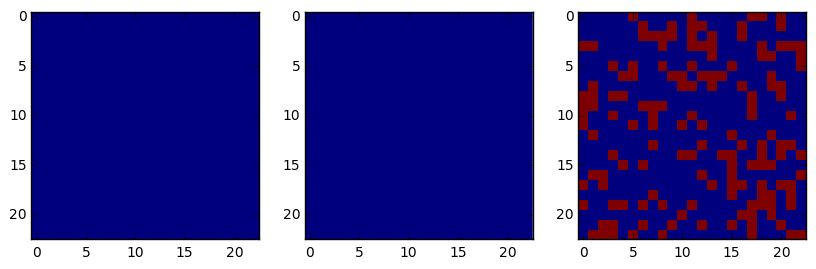

In [11]:
visualize_game(model, view=0)

In [12]:
scoreboard = model.getScoreBoard()
army_count = np.zeros((model.num_turns, 8))
army_count[:, :model.num_players] = scoreboard['army']

In [17]:
TFRecordOptions = tf.python_io.TFRecordOptions
TFRecordCompressionType = tf.python_io.TFRecordCompressionType

record_iterator = tf.python_io.tf_record_iterator("/Users/abel/data/gio/examples_small/train.tfrecords", options=TFRecordOptions(TFRecordCompressionType.GZIP));

In [18]:
TFRecordOptions = tf.python_io.TFRecordOptions
TFRecordCompressionType = tf.python_io.TFRecordCompressionType

record_iterator = tf.python_io.tf_record_iterator("/Users/abel/data/gio/examples_live/train.tfrecords", options=TFRecordOptions(TFRecordCompressionType.GZIP));

In [19]:
records = list(record_iterator)

In [20]:
ex = tf.train.Example()
ex.ParseFromString(records[0])

In [46]:
num_live = [getLivePlayers(i) for i in range(20000,21000)]

In [47]:
print(np.average(num_live))

4.067


In [33]:
def getLivePlayers(idx):
    ex = tf.train.Example()
    ex.ParseFromString(records[idx])
    return np.sum(np.array(ex.features.feature['army_count'].float_list.value) > 0)

In [47]:
board_size = GioConstants.max_width * \
    GioConstants.max_height * GioConstants.num_channels

features = tf.parse_single_example(ex.SerializeToString(), features = {
  'width': tf.FixedLenFeature([], dtype=tf.int64),
  'height': tf.FixedLenFeature([], dtype=tf.int64),
  'num_players': tf.FixedLenFeature([], dtype=tf.int64),
  'num_turns': tf.FixedLenFeature([], dtype=tf.int64),
  'board': tf.FixedLenFeature([board_size], dtype=tf.float32),
  'army_count': tf.FixedLenFeature([GioConstants.max_players], dtype=tf.float32),
  'fort_count': tf.FixedLenFeature([GioConstants.max_players], dtype=tf.float32),
  'land_count': tf.FixedLenFeature([GioConstants.max_players], dtype=tf.float32),
  'label': tf.FixedLenFeature([], dtype=tf.int64)
})

In [48]:
features

{'army_count': <tf.Tensor 'ParseSingleExample_4/Squeeze_army_count:0' shape=(8,) dtype=float32>,
 'board': <tf.Tensor 'ParseSingleExample_4/Squeeze_board:0' shape=(3072,) dtype=float32>,
 'fort_count': <tf.Tensor 'ParseSingleExample_4/Squeeze_fort_count:0' shape=(8,) dtype=float32>,
 'height': <tf.Tensor 'ParseSingleExample_4/Squeeze_height:0' shape=() dtype=int64>,
 'label': <tf.Tensor 'ParseSingleExample_4/Squeeze_label:0' shape=() dtype=int64>,
 'land_count': <tf.Tensor 'ParseSingleExample_4/Squeeze_land_count:0' shape=(8,) dtype=float32>,
 'num_players': <tf.Tensor 'ParseSingleExample_4/Squeeze_num_players:0' shape=() dtype=int64>,
 'num_turns': <tf.Tensor 'ParseSingleExample_4/Squeeze_num_turns:0' shape=() dtype=int64>,
 'width': <tf.Tensor 'ParseSingleExample_4/Squeeze_width:0' shape=() dtype=int64>}

In [56]:
board_val = tf.reshape(features['board'], [32, 32, -1]).eval()

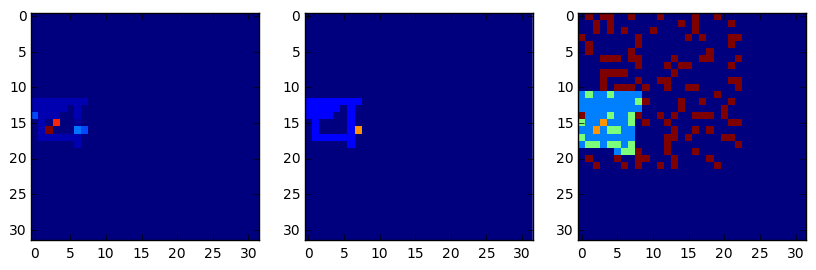

In [59]:
norms = [matplotlib.colors.Normalize(0, 1),
         matplotlib.colors.Normalize(-1, 7),
         matplotlib.colors.Normalize(0, 4)]

fig, axs = plt.subplots(1, 3, figsize=(10, 10))
for i in range(3):
    axs[i].imshow(board_val[:, :, i], interpolation='none', norm=norms[i])

In [14]:
records = list(record_iterator)

In [15]:
# record = record_iterator.next()

In [16]:
record = records[6]

In [17]:
ex = tf.train.SequenceExample()
ex.ParseFromString(record)

In [608]:
ex.context

feature {
  key: "height"
  value {
    int64_list {
      value: 18
    }
  }
}
feature {
  key: "label"
  value {
    int64_list {
      value: 0
    }
  }
}
feature {
  key: "num_players"
  value {
    int64_list {
      value: 2
    }
  }
}
feature {
  key: "num_turns"
  value {
    int64_list {
      value: 167
    }
  }
}
feature {
  key: "width"
  value {
    int64_list {
      value: 17
    }
  }
}

In [609]:
serialized_example = ex.SerializeToString()

context_features_def = {
  'width': tf.FixedLenFeature([], dtype=tf.int64),
  'height': tf.FixedLenFeature([], dtype=tf.int64),
  'num_players': tf.FixedLenFeature([], dtype=tf.int64),
  'num_turns': tf.FixedLenFeature([], dtype=tf.int64),
  'label': tf.FixedLenFeature([], dtype=tf.int64)
}
board_size = GioConstants.max_width * \
    GioConstants.max_height * GioConstants.num_channels
sequence_features_def = {
  'board': tf.FixedLenSequenceFeature([board_size], dtype=tf.float32),
  'army_count': tf.FixedLenSequenceFeature([GioConstants.max_players],
                                           dtype=tf.float32),
  'fort_count': tf.FixedLenSequenceFeature([GioConstants.max_players],
                                           dtype=tf.float32),
  'land_count': tf.FixedLenSequenceFeature([GioConstants.max_players],
                                           dtype=tf.float32),
}
context_features, sequence_features = tf.parse_single_sequence_example(
    serialized=serialized_example,
    context_features=context_features_def,
    sequence_features=sequence_features_def)

In [610]:
board = tf.cast(sequence_features['board'], tf.float32)
army_count = tf.cast(sequence_features['army_count'], tf.float32)
land_count = tf.cast(sequence_features['land_count'], tf.float32)
fort_count = tf.cast(sequence_features['fort_count'], tf.float32)

In [611]:
land_count.eval()[150:]

array([[ 0.86153847,  0.36923078,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.86153847,  0.36923078,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.87692308,  0.36923078,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.8923077 ,  0.36923078,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.90769231,  0.36923078,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.90769231,  0.36923078,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.92307693,  0.36923078,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.92307693,  0.36923078,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.93846154,  0.36923078

In [588]:
board_val = board.eval().reshape(-1, 32, 32, 3)

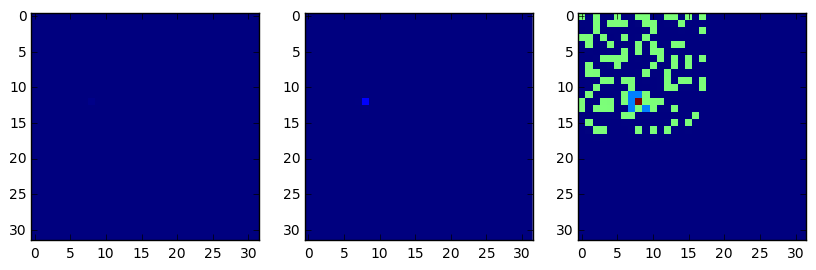

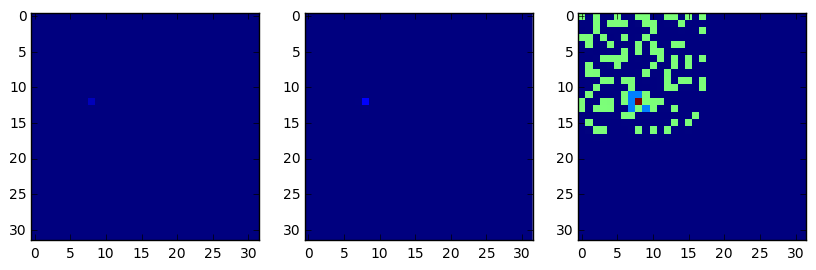

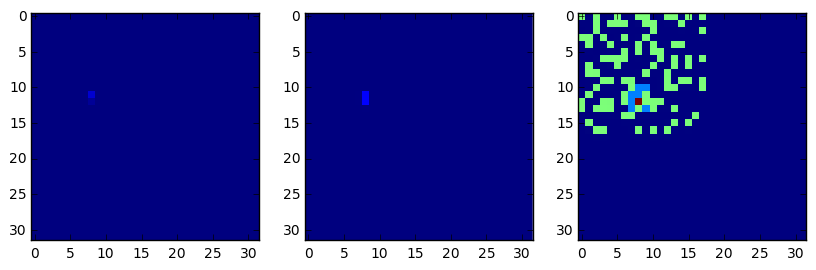

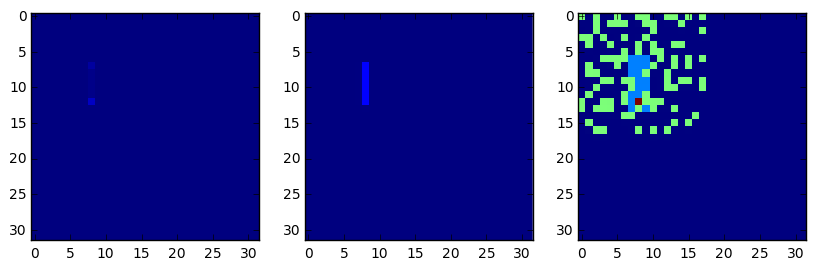

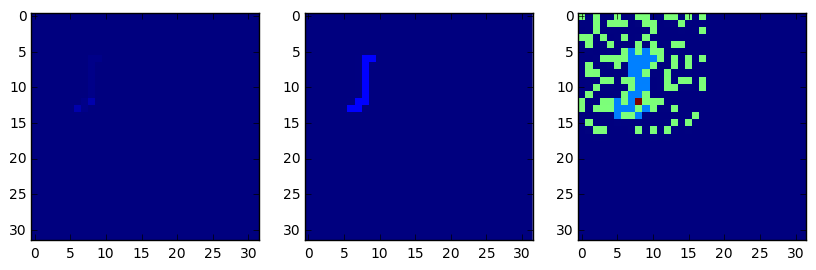

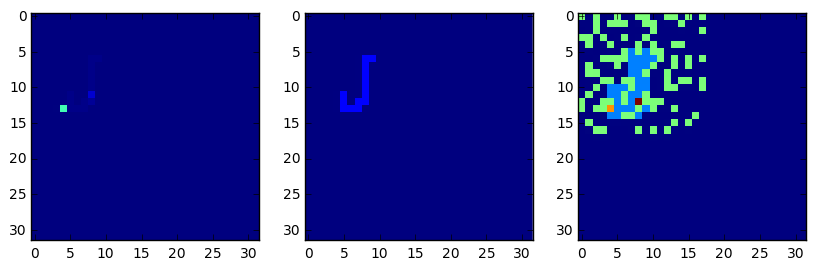

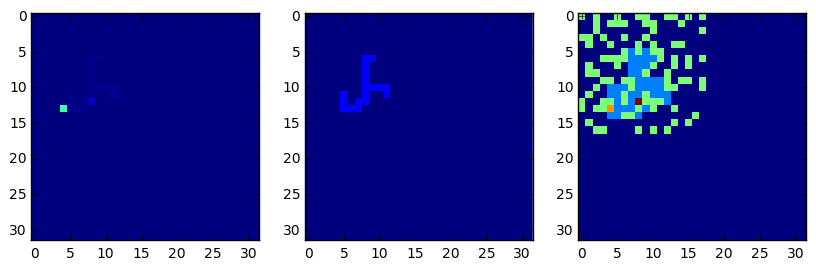

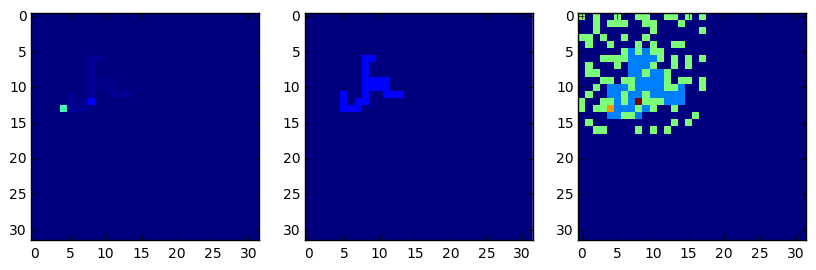

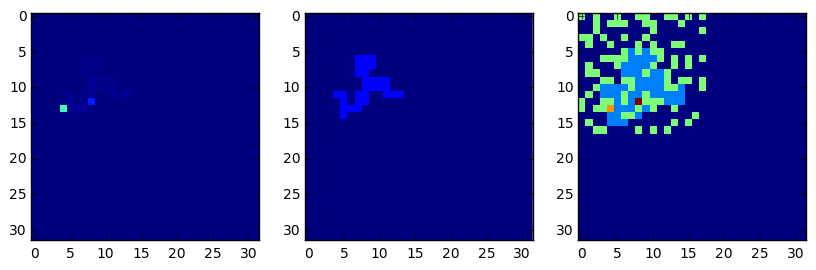

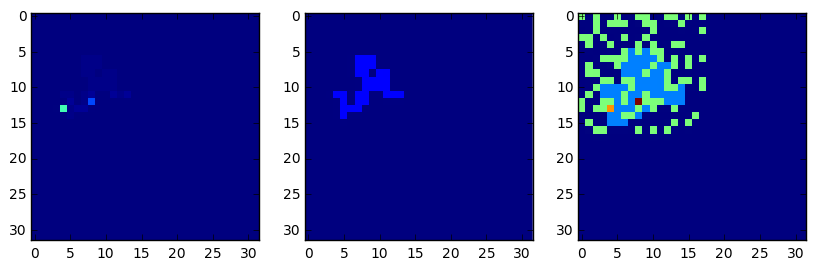

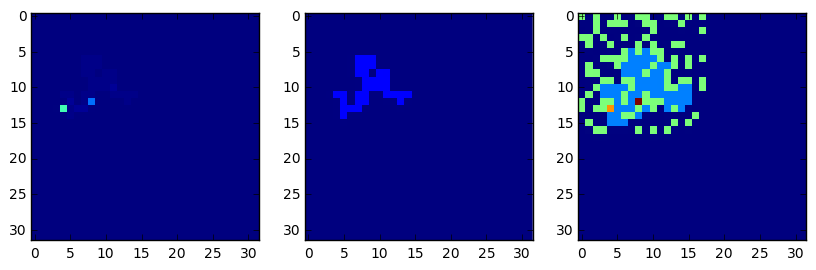

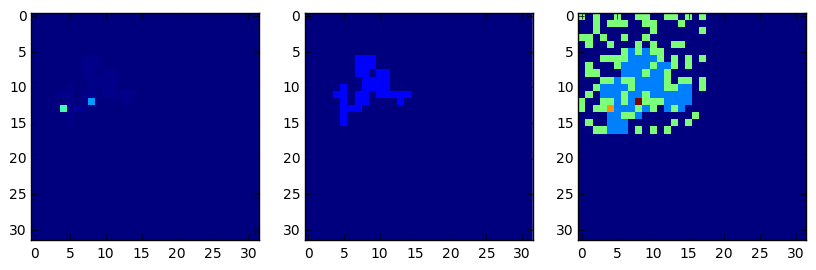

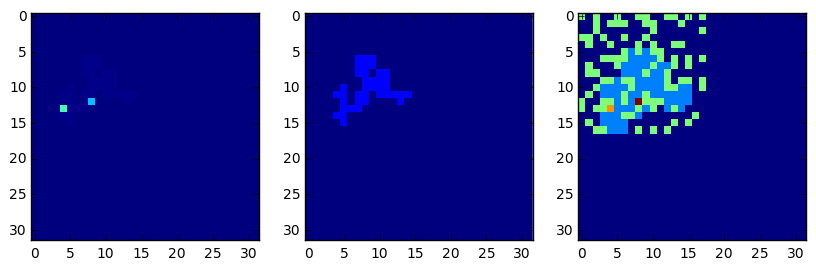

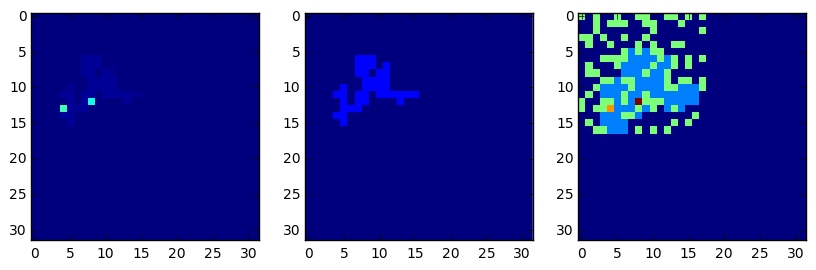

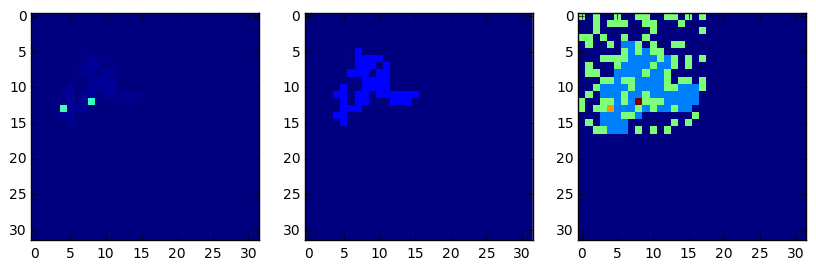

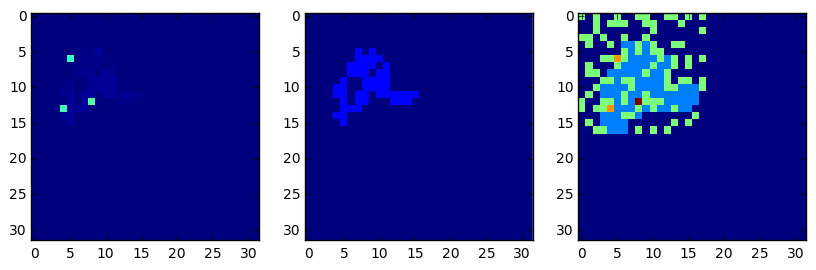

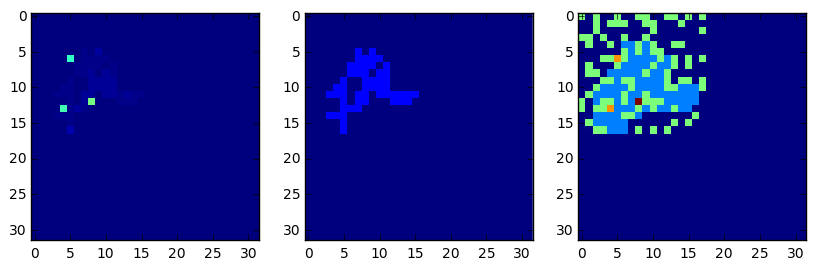

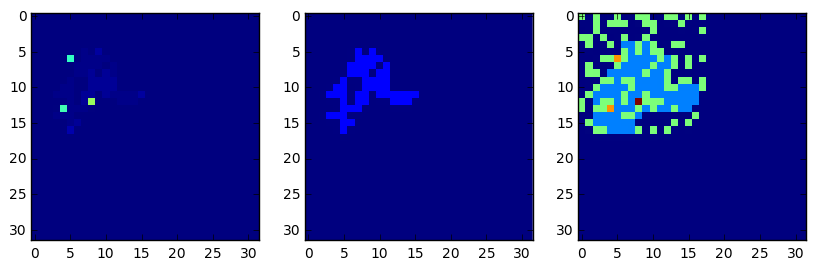

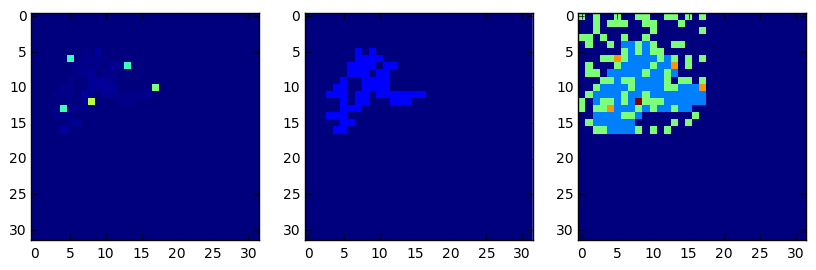

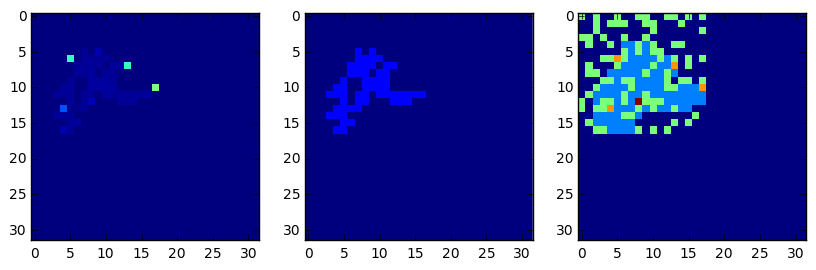

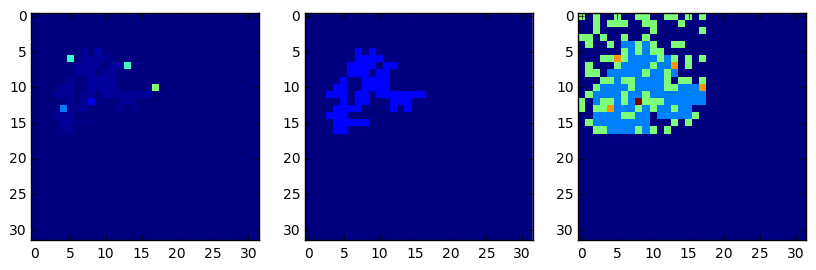

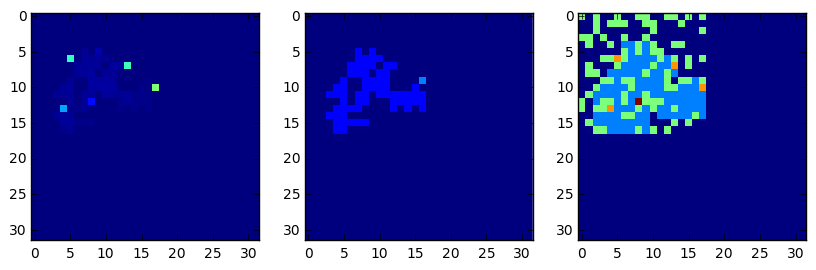

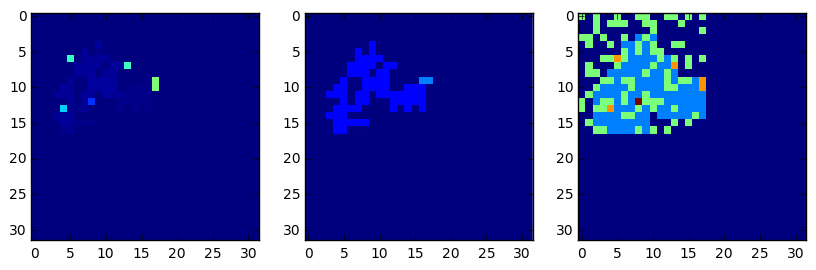

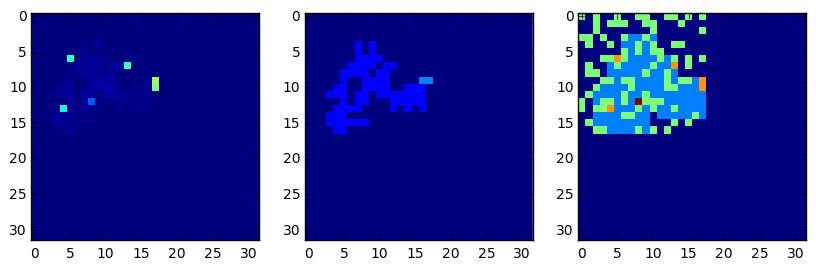

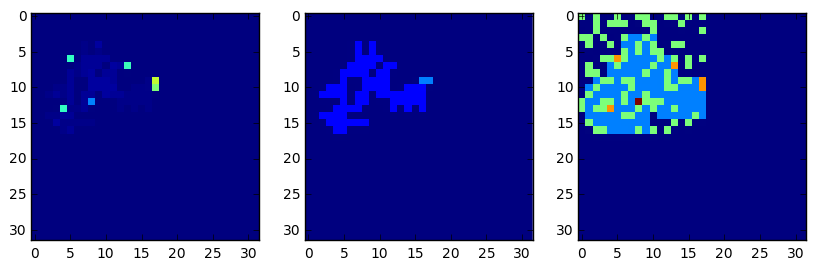

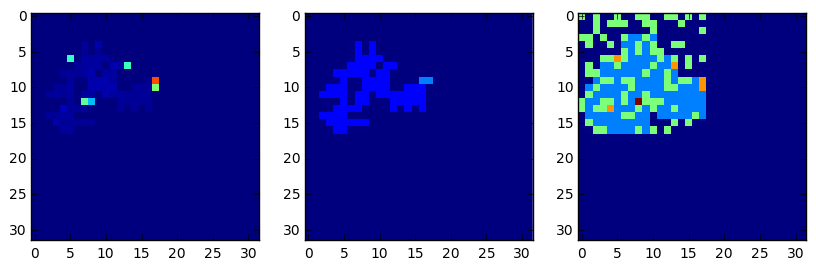

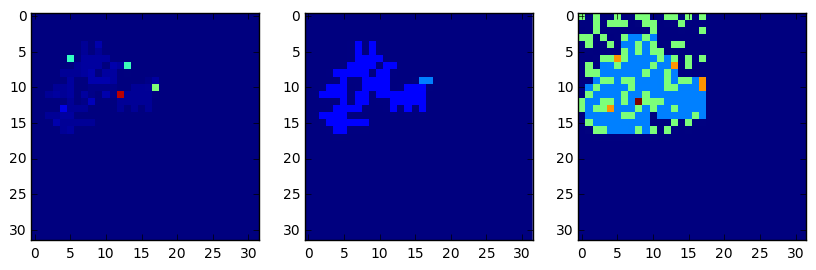

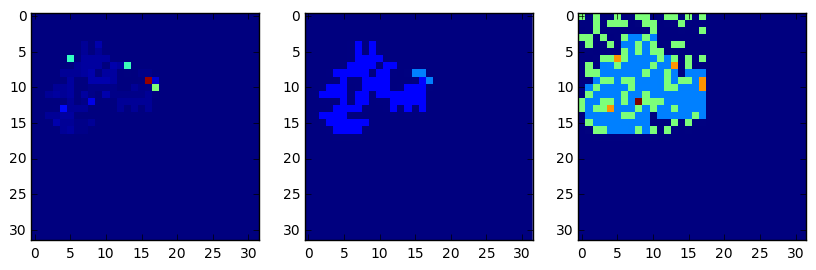

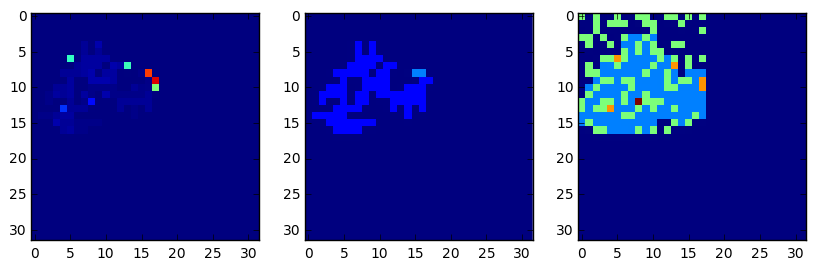

In [657]:
norms = [matplotlib.colors.Normalize(0, 1),
         matplotlib.colors.Normalize(-1, 7),
         matplotlib.colors.Normalize(0, 4)]
res = 8
for i in range(board_val.shape[0] // res):
    turn = i * res
    fig, axs = plt.subplots(1, 3, figsize=(10, 10))
    for i in range(3):
        axs[i].imshow(board_val[turn][:, :, i], interpolation='none', norm=norms[i])

In [50]:
a = np.random.random(10)
print a

[ 0.20286487  0.72173344  0.6783934   0.45121279  0.26284706  0.32678515
  0.29246355  0.95043812  0.51396686  0.61884923]


In [61]:
av = tf.reduce_sum(tf.cast(tf.constant(a) > 0.3, tf.int32))

In [65]:
av.name

u'Sum_3:0'